In [105]:
import geopandas as gpd
import libpysal as lps
import seaborn as sns
import numpy as np
import tobler as tob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [106]:
schools = gpd.read_file('schools.shp')

<AxesSubplot:>

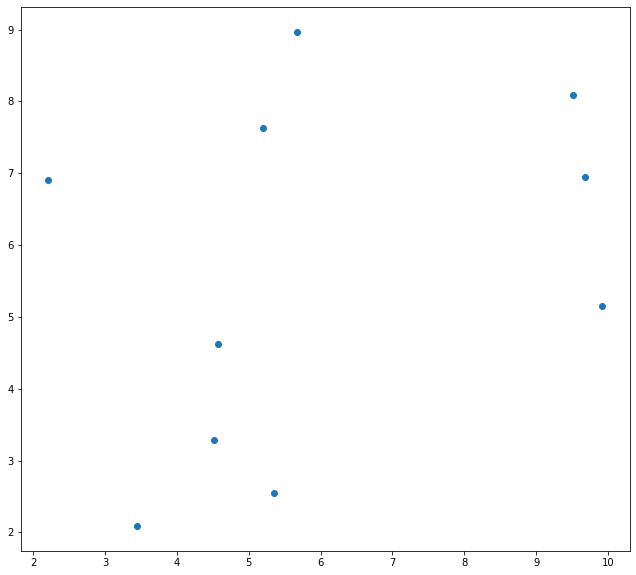

In [107]:
schools.plot()

In [108]:
schools.head()

,test_score,geometry
0,84.621952,POINT (9.51702 8.08617)
1,62.359065,POINT (5.19649 7.63378)
2,38.022265,POINT (2.20963 6.90364)
3,15.609321,POINT (4.51316 3.28197)
4,78.779343,POINT (5.67809 8.96656)


<AxesSubplot:>

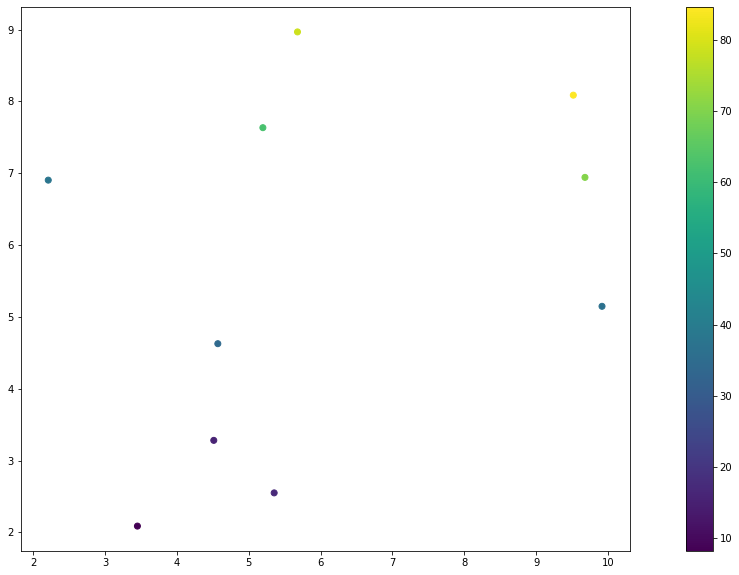

In [109]:
schools.plot(column='test_score', legend=True)

In [110]:
dem = gpd.read_file('demo.shp')

In [111]:
dem.head()

,black,white,total,pctw,pctb,geometry
0,64,336,400,0.8400,0.1600,"POLYGON ((3.60031 8.34527, 4.31160 7.14336, 3...."
1,114,286,400,0.7150,0.2850,"POLYGON ((3.36733 4.62828, 3.41913 5.02266, 3...."
2,147,253,400,0.6325,0.3675,"POLYGON ((2.27505 3.93207, 2.73347 3.66886, 2...."
3,44,356,400,0.8900,0.1100,"POLYGON ((4.95479 8.51631, 5.64418 6.97012, 5...."
4,25,375,400,0.9375,0.0625,"POLYGON ((8.89679 8.93948, 9.46456 11.00000, 1..."


<AxesSubplot:>

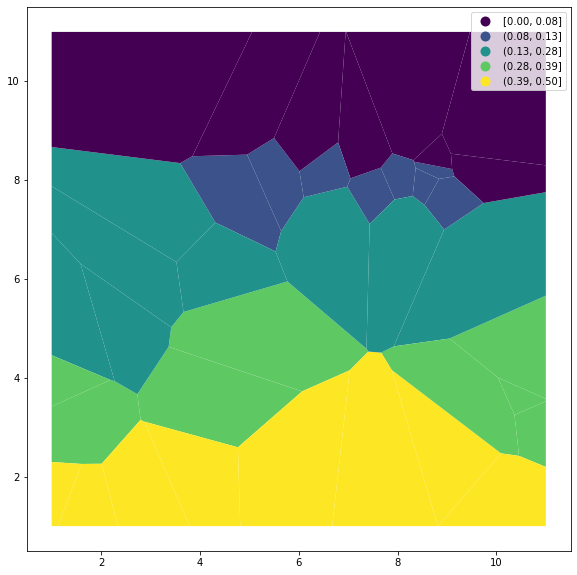

In [112]:
dem.plot(column='pctb', scheme='Quantiles', k=5, legend=True)

# Overlays

<AxesSubplot:>

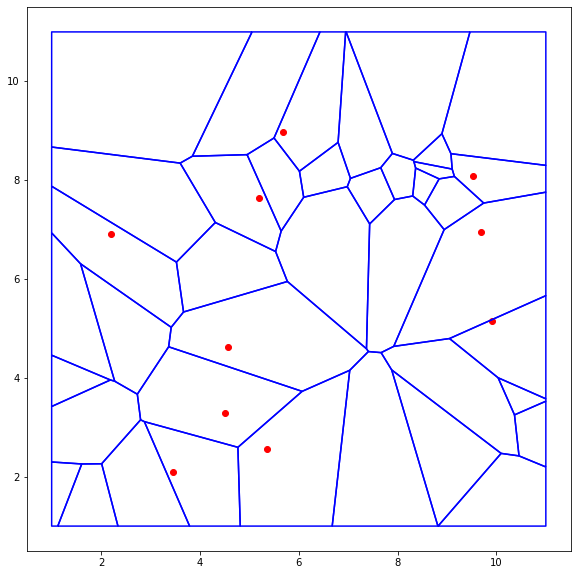

In [113]:
base = dem.geometry.boundary.plot(edgecolor='blue')
schools.plot(color='red', ax=base)

## Equity Anaysis: Are there disparities in access to schools?

Who has better access (w or b)?

In [114]:
school_buffer = gpd.GeoDataFrame(geometry=schools.geometry.buffer(1))

<AxesSubplot:>

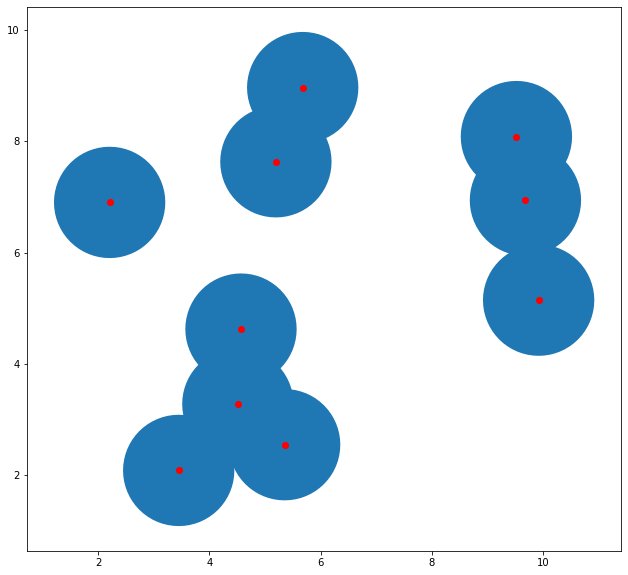

In [115]:
base = school_buffer.plot()
schools.plot(ax=base, color='red')

<AxesSubplot:>

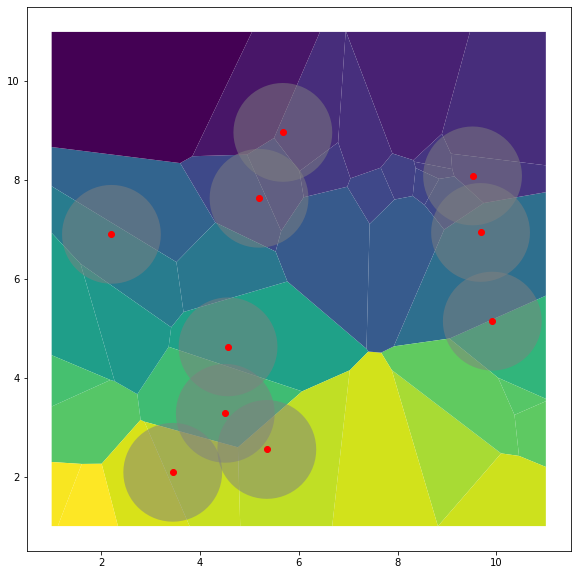

In [116]:
base = dem.plot(column='pctb')
school_buffer.plot(ax=base, alpha=0.5,color='grey')
schools.plot(ax=base, color='red')

In [117]:
dem_diff = gpd.overlay(dem, school_buffer, how='difference')

<AxesSubplot:>

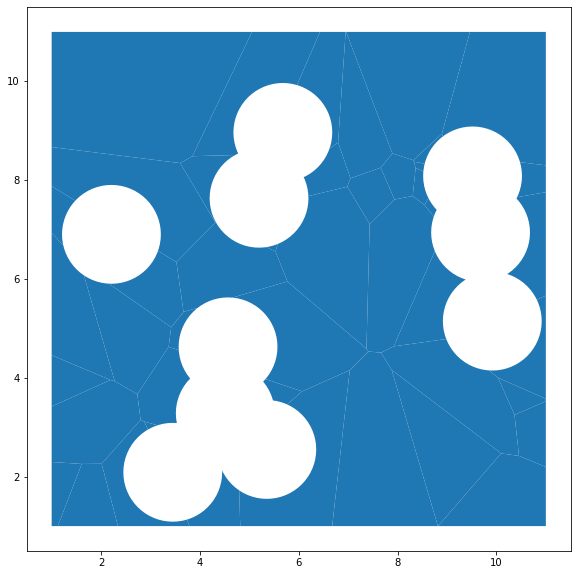

In [118]:
dem_diff.plot()

In [119]:
dem_diff.shape

(39, 6)

In [120]:
dem_out = tob.area_weighted.area_interpolate(source_df=dem,
                                           target_df=dem_diff,
                                           extensive_variables=['white', 'black'])

In [121]:
dem_out.sum()

white    11911.999909
black     3687.999972
dtype: float64

In [122]:
dem[['white', 'black']].sum()

white    12275
black     3725
dtype: int64

In [123]:
dem_in = dem[['white', 'black']].sum() - dem_out.sum().astype(int)

In [124]:
dem_in

white    364
black     38
dtype: int64

In [125]:
dem_in / dem[['white', 'black']].sum()

white    0.029654
black    0.010201
dtype: float64

In [126]:
dem_in['total'] = dem_in.white + dem_in.black

In [127]:
dem.white.sum()/ dem.total.sum()

0.7671875

In [129]:
dem_in.white.sum() / dem_in.total.sum()

0.9054726368159204